In [2]:
import gym
import gym_anytrading
from gym_custom_trading import MyStockEnv
from gym_anytrading.envs import TradingEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import STOCKS_GOOGL
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import pandas as pd
from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv


# Creating Environment

In [3]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()
window_size=30
start_index=window_size
end_index = len(df)


In [4]:
env_maker = lambda : MyStockEnv.MyStocksEnv(budget=1, df=df, window_size=window_size, frame_bound=(start_index, end_index))

env = DummyVecEnv([env_maker])

# Training model

In [5]:
policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
# model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=1000)
model.save("a2c_googl_stocks2_new")






Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

---------------------------------
| explained_variance | 0.0102   |
| fps                | 7        |
| nupdates           | 1        |
| policy_entropy     | 1.1      |
| total_timesteps    | 5        |
| value_loss         | 26.8     |
---------------------------------
----------------------------------
| explained_variance | -0.000315 |
| fps                | 262       |
| nupdates           | 100       |
| policy_entropy     | 1.09      |
| total_timesteps    | 500       |
| value_loss         | 30.3      |
----------------------------------
----------------------------------
| explained_variance | -6.38e-05 |
| fps                | 316       |
| nupdates           | 200       |
| policy_entropy     | 1.09

# Testing Environment

In [6]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': -1914.0240056250009, 'total_profit': 465.6183929999997, 'position': 1}


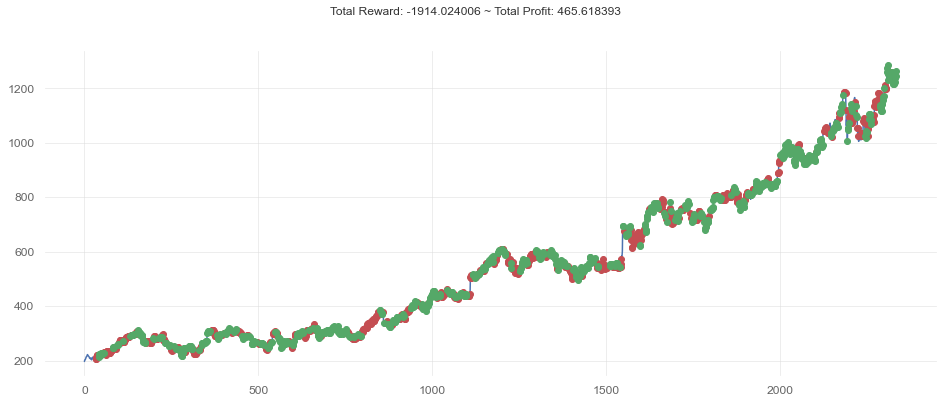

In [7]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

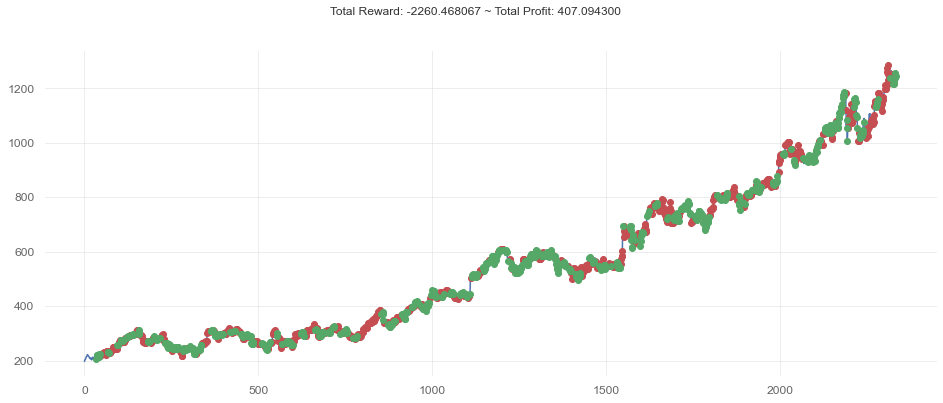

In [17]:
#OLD RUN
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

# Analysis using quantstats

                           Strategy
-------------------------  ----------
Start Period               2009-07-09
End Period                 2018-08-29
Risk-Free Rate             0.0%
Time in Market             11.0%

Cumulative Return          46,461.84%
CAGR%                      -100.0%
Sharpe                     -5.38
Sortino                    -5.09
Max Drawdown               -116.97%
Longest DD Days            798
Volatility (ann.)          326.46%
Calmar                     -1.0
Skew                       -2.62
Kurtosis                   4.85

Expected Daily %           -100.0%
Expected Monthly %         -100.0%
Expected Yearly %          -100.0%
Kelly Criterion            nan%
Risk of Ruin               1.0%
Daily Value-at-Risk        -60.28%
Expected Shortfall (cVaR)  -60.28%

Payoff Ratio               nan
Profit Factor              0.0
Common Sense Ratio         0.0
CPC Index                  nan
Tail Ratio                 0.0
Outlier Win Ratio          nan
Outlier Loss Ratio 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2010-01-26,2010-01-26,2010-10-20,267,-116.969784,-114.873367
2,2011-11-02,2013-04-05,2014-01-08,798,-58.667749,-55.489938
3,2009-07-27,2009-07-29,2009-08-12,16,-47.476094,-16.483628
4,2015-10-30,2016-04-11,2017-02-08,467,-42.527035,-41.345210
5,2014-07-30,2015-03-25,2015-10-28,455,-30.834736,-30.120460


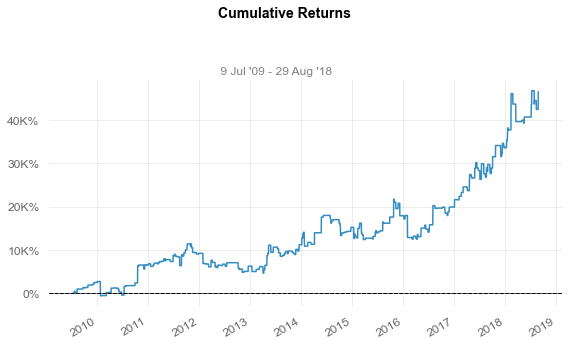

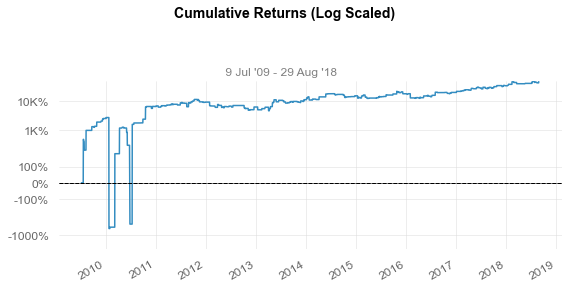

TypeError: 'method' object is not subscriptable

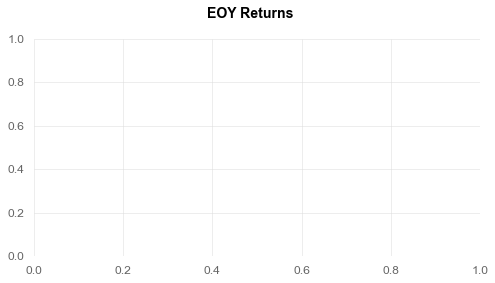

In [8]:

qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')